In [1]:
!pip install qiskit qiskit-aer pylatexenc matplotlib


  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/9c/f2/708f8d18d22461a0394aad48232accd8e3e55ff83ad49b8ad14c205603ea/qiskit-1.2.4-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for qiskit-aer from https://files.pythonhosted.org/packages/0c/61/7cb8571a1f767e08511617c8e2ffc8284b1e512a3081807bea54772e58bc/qiskit_aer-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:002.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/01/75/6c7ce560e95714a10fcbb3367d1304975a1a3e620f72af28921b796403f3/matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency informati

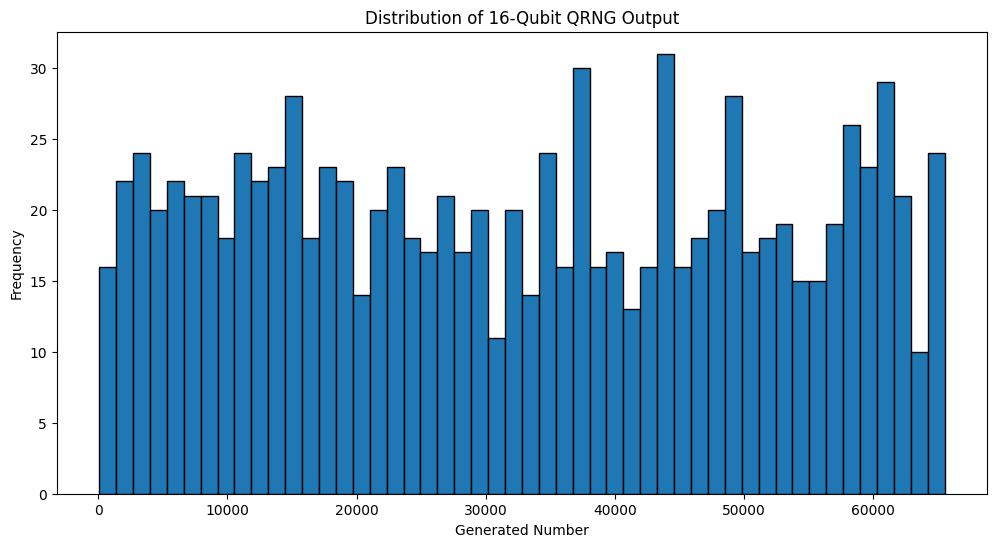


Quantum Circuit:
      ┌───┐┌─┐                                             
 q_0: ┤ H ├┤M├─────────────────────────────────────────────
      ├───┤└╥┘┌─┐                                          
 q_1: ┤ H ├─╫─┤M├──────────────────────────────────────────
      ├───┤ ║ └╥┘┌─┐                                       
 q_2: ┤ H ├─╫──╫─┤M├───────────────────────────────────────
      ├───┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ H ├─╫──╫──╫─┤M├────────────────────────────────────
      ├───┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ H ├─╫──╫──╫──╫─┤M├─────────────────────────────────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ├───┤ ║  ║  ║  ║

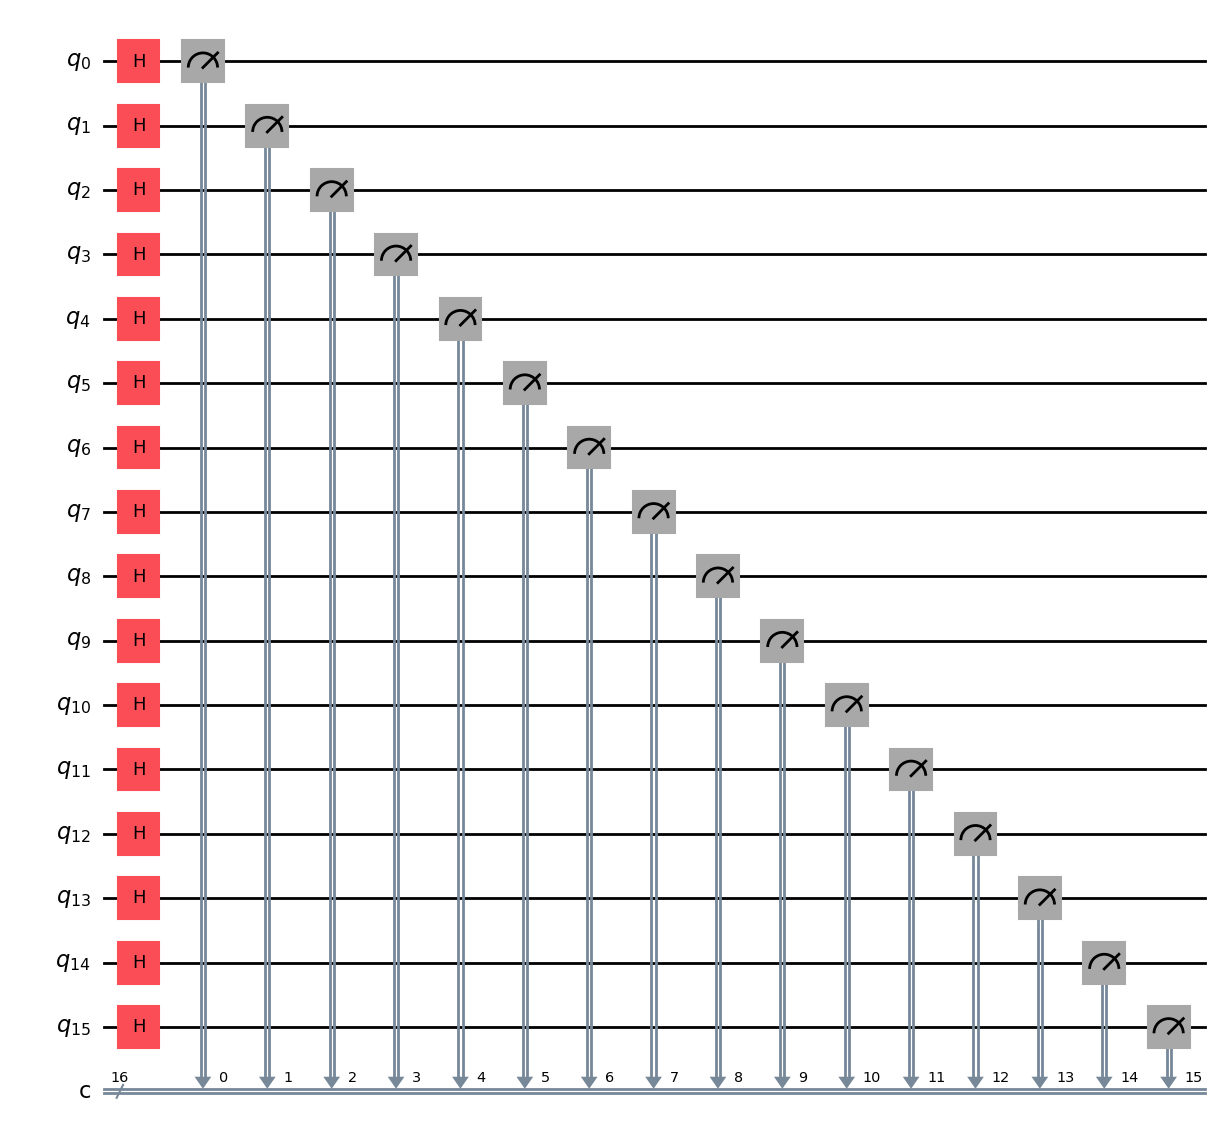

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

def generate_random_number():
    
    circuit = QuantumCircuit(16, 16)
    
    circuit.h(range(16))
    
    circuit.measure(range(16), range(16))
    
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts(circuit)
    
    bitstring = list(counts.keys())[0]
    random_number = int(bitstring, 2)
    return random_number, bitstring


random_numbers = [generate_random_number()[0] for _ in range(1000)]


plt.figure(figsize=(12, 6))
plt.hist(random_numbers, bins=50, edgecolor='black')
plt.title('Distribution of 16-Qubit QRNG Output')
plt.xlabel('Generated Number')
plt.ylabel('Frequency')
plt.show()


circuit = QuantumCircuit(16, 16)
circuit.h(range(16))
circuit.measure(range(16), range(16))
print("\nQuantum Circuit:")
print(circuit)


single_random_number, binary_representation = generate_random_number()
print(f"\nSingle Random Number Generation:")
print(f"Random number (decimal): {single_random_number}")
print(f"Random number (binary): {binary_representation}\n")


print(f"\nStatistics")
print(f"Min: {min(random_numbers)}")
print(f"Max: {max(random_numbers)}")
print(f"Mean: {sum(random_numbers) / len(random_numbers)}")


circuit.draw(output='mpl')